## 系统描述

$$X_k = A X_{k-1} + B U_k + W_k$$

## 测量值

$$Z_k = H X_k + V_k$$

## 预测

$$\hat{x_t^-} = F \hat{x_{t-1}} + B u_{t-1}$$

$$\hat{P_t^-} = F \hat{P_{t-1}} F^T + Q$$

## 更新

$$K_t = P_t^- H^T (H P_t^- H^T + R)^{-1}$$

$$\hat{x_t} = \hat{x_t^-} + K_t (Z_t - H \hat{x_t^-})$$

$$P_t = (I - K_t H) P_t^-$$


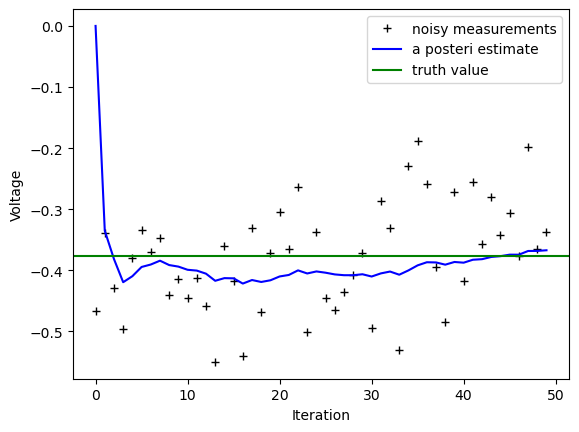

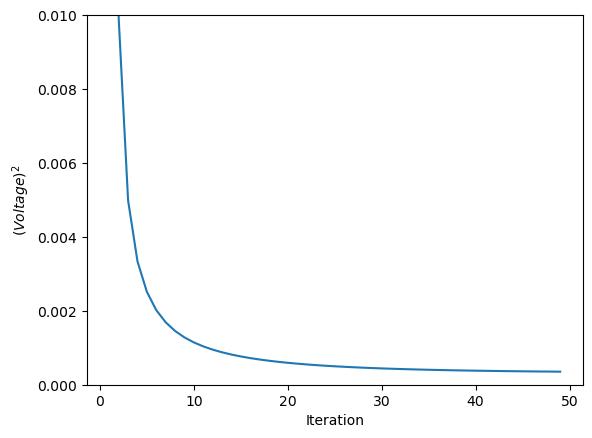

In [7]:
# -*- coding=utf-8 -*-  
# Kalman filter example demo in Python  
    
# A Python implementation of the example given in pages 11-15 of "An  
# Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,  
# University of North Carolina at Chapel Hill, Department of Computer  
# Science, TR 95-041,  
# http://www.cs.unc.edu/~welch/kalman/kalmanIntro.html  
    
# by Andrew D. Straw  
#coding:utf-8  
import numpy  
import pylab  
import matplotlib.pyplot as plt
%matplotlib inline

#这里是假设A=1，H=1的情况
A = np.array([1])
H = np.array([1])

# 参数初始化  
n_iter = 50  
sz = (n_iter,) # size of array  
x = -0.37727 # 真实值  
z = numpy.random.normal(x,0.1,size=sz) # 观测值 ,观测时存在噪声
    
Q = 1e-5 # process variance  
    
# 分配数组空间  
xhat=numpy.zeros(sz)      # x 滤波估计值  
P=numpy.zeros(sz)         # 滤波估计协方差矩阵  
xhatminus=numpy.zeros(sz) #  x 估计值  
Pminus=numpy.zeros(sz)    # 估计协方差矩阵  
K=numpy.zeros(sz)         # 卡尔曼增益  

R = 0.1**2 # estimate of measurement variance, change to see effect  

# intial guesses  
xhat[0] = 0.0  
P[0] = 1.0  

for k in range(1,n_iter):  
    # 预测  
    xhatminus[k] = xhat[k-1]  #X(k|k-1) = AX(k-1|k-1) + BU(k) + W(k),A=1,BU(k) = 0  
    Pminus[k] = P[k-1] + Q      #P(k|k-1) = AP(k-1|k-1)A' + Q(k) ,A=1  
    
    # 更新  
    K[k] = Pminus[k]/( Pminus[k]+R ) #Kg(k)=P(k|k-1)H'/[HP(k|k-1)H' + R],H=1  
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k]) #X(k|k) = X(k|k-1) + Kg(k)[Z(k) - HX(k|k-1)], H=1  
    P[k] = (1-K[k])*Pminus[k] #P(k|k) = (1 - Kg(k)H)P(k|k-1), H=1  
    
pylab.figure()  
pylab.plot(z,'k+',label='noisy measurements')     #观测值  
pylab.plot(xhat,'b-',label='a posteri estimate')  #滤波估计值  
pylab.axhline(x,color='g',label='truth value')    #真实值  
pylab.legend()  
pylab.xlabel('Iteration')  
pylab.ylabel('Voltage')  
    
pylab.figure()  
valid_iter = range(1,n_iter) # Pminus not valid at step 0  
pylab.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')  
pylab.xlabel('Iteration')  
pylab.ylabel('$(Voltage)^2$')  
pylab.setp(pylab.gca(),'ylim',[0,.01])  
pylab.show()  


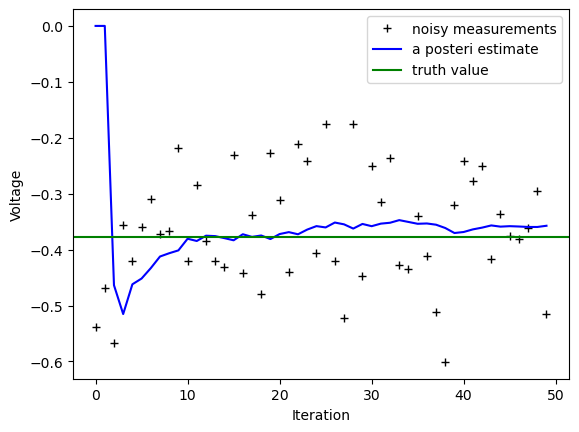

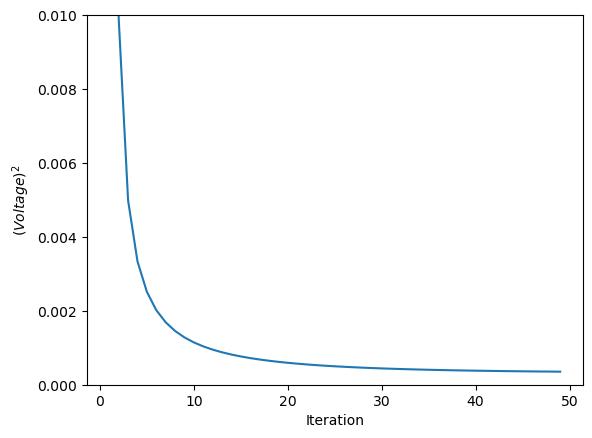

In [4]:
# %pip install filterpy

from filterpy.kalman import KalmanFilter
import numpy as np
np.random.seed(0)
kf = KalmanFilter(dim_x=1, dim_z=1)
kf.F = np.array([1])
kf.H = np.array([1])
kf.R = np.array([0.1**2])
kf.P = np.array([1.0])
kf.Q = 1e-5 
xhat[0] = 0.0  
P[0] = 1.0 
for k in range(1,n_iter):  
    kf.predict()
    xhat[k] = kf.x
    kf.update(z[k], 0.1**2, np.array([1]))

pylab.figure()  
pylab.plot(z,'k+',label='noisy measurements')     #观测值  
pylab.plot(xhat,'b-',label='a posteri estimate')  #滤波估计值  
pylab.axhline(x,color='g',label='truth value')    #真实值  
pylab.legend()  
pylab.xlabel('Iteration')  
pylab.ylabel('Voltage')  

pylab.figure()  
valid_iter = range(1,n_iter) # Pminus not valid at step 0  
pylab.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')  
pylab.xlabel('Iteration')  
pylab.ylabel('$(Voltage)^2$')  
pylab.setp(pylab.gca(),'ylim',[0,.01])  
pylab.show()  


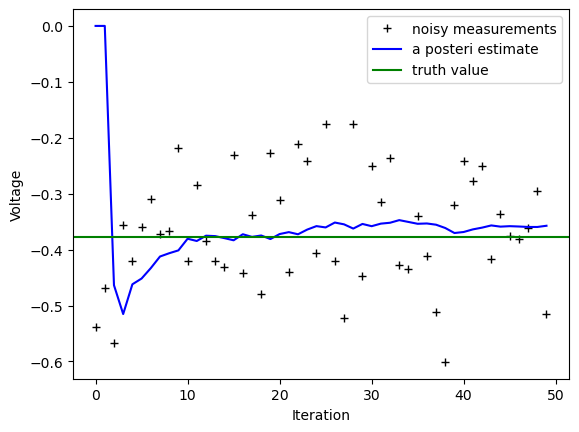

In [5]:
import cv2

kalman = cv2.KalmanFilter(1, 1)
kalman.transitionMatrix = np.array([[1]], np.float32)  # 转移矩阵 A
kalman.measurementMatrix = np.array([[1]], np.float32)  # 测量矩阵    H
kalman.measurementNoiseCov = np.array([[1]], np.float32) * 0.01 # 测量噪声        R
kalman.processNoiseCov = np.array([[1]], np.float32) * 1e-5  # 过程噪声 Q
kalman.errorCovPost = np.array([[1.0]], np.float32)  # 最小均方误差 P

xhat = np.zeros(sz)  # x 滤波估计值 
kalman.statePost = np.array([xhat[0]], np.float32)
for k in range(1, n_iter):
#     print(np.array([z[k]], np.float32))
    mes = np.reshape(np.array([z[k]], np.float32), (1, 1))
# #     print(mes.shape)
    xhat[k] = kalman.predict()
    kalman.correct(np.array(mes, np.float32))

pylab.figure()
pylab.plot(z, 'k+', label='noisy measurements')  # 观测值
pylab.plot(xhat, 'b-', label='a posteri estimate')  # 滤波估计值
pylab.axhline(x, color='g', label='truth value')  # 真实值
pylab.legend()
pylab.xlabel('Iteration')
pylab.ylabel('Voltage')
pylab.show() 
